In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os,time,math
import itertools
import collections

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Read Data

In [23]:
states = ["Alabama","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
print(len(states))

49


In [87]:
f = open("data/Population and Housing Units: 1940 to 1990.txt", "r")
lines = [""] + [line.strip() for line in f.read().strip().split("\n")]
f.close()

In [89]:
def extract_county_name(line):
    county_name = ""
    i = 0
    while line[i] != "-":
        county_name += line[i]
        i += 1
    return county_name.strip()

def extract_fields(line):
    
    # Forward through the county name
    i = 0
    while line[i] != "-":
        i += 1
    while line[i] == "-":
        i += 1
    line = line[i:].strip()
    
    # 
    parts = line.split(" ")
    fields = []
    
    current_num = ""
    i = 0
    while i<len(parts):
        
        if parts[i][0] == "r":
            parts[i] = parts[i][1:]
            
            if current_num != "":
                fields.append(int(current_num))
            current_num = parts[i]
            
        elif len(parts[i]) < 3: # The current part is definitely the start of a number
            
            if current_num != "": # we will not have to save the previous number at the start of a line
                fields.append(int(current_num))
            current_num = parts[i]
                           
        elif len(parts[i]) == 3: # Our current part has length 3The current part may be the start of a number
            
            if parts[i][0] == "0": # definitely not start of a number
                current_num += parts[i]
            elif len(current_num) == 6: # if we already have 2 full blocks lets skip
                fields.append(int(current_num))
                current_num = parts[i]
            else:
                current_num += parts[i]
        else:
            print("Something is wrong: %s" % (parts))
        
        i += 1
        
    if current_num != "": # Add the last number
        fields.append(int(current_num))
    
    return fields


WRITE = False
if WRITE:
    f = open("data/Population and Housing Units: 1940 to 1990.csv", "w")

i = 0
problems = 0
current_state = ""
state_pointer = -1
while i < len(lines):
    line = lines[i]
    if line == "":
        i += 1
        state_pointer += 1
        current_state = lines[i]
        assert current_state == states[state_pointer]
        
        if WRITE:
            f.write("%s\n" % (current_state))
    else:
        county_name = extract_county_name(line)
        data_fields = extract_fields(line)
        
        assert data_fields[0] != ""
        
        if WRITE:
            f.write("%s," % (county_name))
            if len(data_fields) == 12:
                f.write(",")
            else:
                f.write("PROBLEM,")
            f.write(",".join(map(str,data_fields)))
            f.write("\n")
        
        if len(data_fields) != 12:
            problems += 1
        
    i += 1

print(problems)
if WRITE:
    f.close()

243


In [71]:
def extract_fields_toy(line):   
    # Forward through the county name
    i = 0
    while line[i] != "-":
        i += 1
    while line[i] == "-":
        i += 1
    line = line[i:].strip()
    
    # 
    return line.split(" ")

line_sizes = []  
i = 0
current_state = ""
state_pointer = -1
while i < len(lines):
    line = lines[i]
    if line == "":
        i += 1
        state_pointer += 1
        current_state = lines[i]
        assert current_state == states[state_pointer]
    else:
        data_fields = extract_fields_toy(line)
        line_sizes.append(len(data_fields))
    i += 1
    
line_sizes = np.array(line_sizes)

[(7, 2), (11, 3), (12, 3), (13, 7), (14, 4), (15, 8), (16, 6), (17, 5), (18, 36), (19, 6), (20, 21), (21, 21), (22, 20), (23, 31), (24, 2906), (25, 6), (26, 4), (27, 8), (28, 2), (29, 2), (30, 8), (35, 1), (36, 1)]


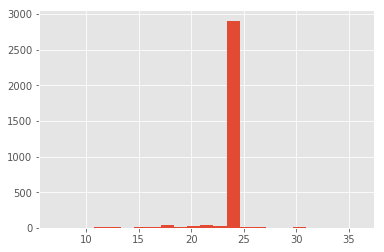

In [78]:
plt.figure()

uniques, counts = np.unique(line_sizes, return_counts=True)
print(zip(uniques, counts))

plt.hist(line_sizes, bins=23)

plt.show()
plt.close()